### Projekt 1: "Gapminder Data Visualization""

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

### 1. Reading the data

In [2]:
# Government spending on health care
spending = pd.read_csv('government_health_spending_per_person_international_dollar.csv', index_col=0)
spending.head(4)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
Albania,13.9,17.1,14.2,18.6,28.1,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
Algeria,46.8,48.0,49.7,48.7,45.5,45.9,52.5,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00
Andorra,897.0,983.0,967.0,1340.0,942.0,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00


In [3]:
# Life expectancy
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
life.head(4)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.4,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10


### 2. Data exploration

In [4]:
# Checking whether both tables have the same shape 
life.shape, spending.shape

((260, 217), (190, 16))

In [5]:
# Checking the type of the columns
life.columns, spending.columns

(Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
             ...
             2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
            dtype='int64', length=217),
 Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
        '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
       dtype='object'))

In [6]:
# Columns have a different data types (life: integer numbers, spending: objects). Converting spending-DF into integer numbers
spending.columns = spending.columns.astype(int)
spending.columns

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010],
           dtype='int64')

In [7]:
# Checking the row indexes of the both tables
spending.index
spending.head(4)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
Albania,13.9,17.1,14.2,18.6,28.1,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
Algeria,46.8,48.0,49.7,48.7,45.5,45.9,52.5,54.100,62.60,63.20,69.30,81.70,109.0,148.00,143.00,139.00
Andorra,897.0,983.0,967.0,1340.0,942.0,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00


In [8]:
life.index
life.head(4)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.4,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10


In [9]:
# Rename the row index
life.index.name = 'country'
life

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69


In [10]:
# Converting both tables into long format
spending = spending.reset_index()
spending = spending.melt(id_vars = 'country', var_name = 'year', value_name = 'government_health_spending')
spending

,country,year,government_health_spending
0,Afghanistan,1995,NaN
1,Albania,1995,13.9
2,Algeria,1995,46.8
3,Andorra,1995,897.0
4,Angola,1995,13.5
...,...,...,...
3035,Venezuela,2010,232.0
3036,Vietnam,2010,31.4
3037,Yemen,2010,15.3
3038,Zambia,2010,43.9


In [11]:
# The same for 'life'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


### 3. Adding a new data and repeating the steps above for the new DF

In [12]:
gdp = pd.read_csv("total_gdp_us_inflation_adjusted.csv", index_col = 0)
gdp.head(4)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.590000e+10,1.590000e+10,1.800000e+10,1.900000e+10,1.950000e+10,1.980000e+10,2.020000e+10,2.070000e+10,2.110000e+10,2.170000e+10
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10,1.350000e+10,1.400000e+10,1.450000e+10,1.490000e+10
Algeria,2.740000e+10,2.370000e+10,1.900000e+10,2.560000e+10,2.710000e+10,2.870000e+10,2.740000e+10,3.000000e+10,3.320000e+10,3.600000e+10,...,1.610000e+11,1.660000e+11,1.720000e+11,1.760000e+11,1.830000e+11,1.900000e+11,1.960000e+11,1.980000e+11,2.010000e+11,2.030000e+11
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.450000e+09,3.450000e+09,3.280000e+09,3.160000e+09,3.240000e+09,3.290000e+09,3.410000e+09,3.420000e+09,3.480000e+09,3.540000e+09


In [13]:
gdp.shape, gdp.columns

((191, 60),
 Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
        '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
        '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
        '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
        '2014', '2015', '2016', '2017', '2018', '2019'],
       dtype='object'))

In [14]:
# Converting into integer numbers
gdp.columns = gdp.columns.astype(int)
gdp.columns

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019],
           dtype='int64')

In [15]:
gdp.index
gdp.head(4)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.590000e+10,1.590000e+10,1.800000e+10,1.900000e+10,1.950000e+10,1.980000e+10,2.020000e+10,2.070000e+10,2.110000e+10,2.170000e+10
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10,1.350000e+10,1.400000e+10,1.450000e+10,1.490000e+10
Algeria,2.740000e+10,2.370000e+10,1.900000e+10,2.560000e+10,2.710000e+10,2.870000e+10,2.740000e+10,3.000000e+10,3.320000e+10,3.600000e+10,...,1.610000e+11,1.660000e+11,1.720000e+11,1.760000e+11,1.830000e+11,1.900000e+11,1.960000e+11,1.980000e+11,2.010000e+11,2.030000e+11
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.450000e+09,3.450000e+09,3.280000e+09,3.160000e+09,3.240000e+09,3.290000e+09,3.410000e+09,3.420000e+09,3.480000e+09,3.540000e+09


In [16]:
# Converting the table into long format
gdp = gdp.reset_index()
gdp = gdp.melt(id_vars='country', var_name='year', value_name='income_per_person')
gdp

,country,year,income_per_person
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,2.740000e+10
3,Andorra,1960,NaN
4,Angola,1960,NaN
...,...,...,...
11455,Venezuela,2019,NaN
11456,Vietnam,2019,2.010000e+11
11457,Yemen,2019,NaN
11458,Zambia,2019,2.960000e+10


### 4. Combining the data into a single object

In [17]:
df = spending.merge(gdp).merge(life)
df.head(4)

,country,year,government_health_spending,income_per_person,life_expectancy
0,Afghanistan,1995,NaN,NaN,49.4
1,Albania,1995,13.9,5.430000e+09,73.7
2,Algeria,1995,46.8,9.320000e+10,71.6
3,Andorra,1995,897.0,2.080000e+09,82.6


### 5. Adding the data with continents

In [18]:
continents = pd.read_csv('gapminder-FiveYearData.csv', index_col=0)

continents.drop('pop', inplace=True, axis=1)
continents.drop('year', inplace=True, axis=1)
continents.drop('lifeExp', inplace=True, axis=1)
continents.drop('gdpPercap', inplace=True, axis=1)

continents.reset_index(level=0, inplace=True)
df = df.merge(continents, how="outer", on="country")
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

df

,country,year,government_health_spending,income_per_person,life_expectancy,continent
84,Afghanistan,2002,0.833,7.470000e+09,51.0,Asia
96,Afghanistan,2003,1.250,8.120000e+09,51.4,Asia
108,Afghanistan,2004,1.610,8.240000e+09,51.8,Asia
120,Afghanistan,2005,2.520,9.160000e+09,52.0,Asia
132,Afghanistan,2006,2.810,9.660000e+09,52.1,Asia
...,...,...,...,...,...,...
25512,Zimbabwe,1997,30.100,1.740000e+10,52.8,Africa
25524,Zimbabwe,1998,29.400,1.790000e+10,50.9,Africa
25536,Zimbabwe,1999,17.600,1.780000e+10,49.3,Africa
25548,Zimbabwe,2000,31.500,1.720000e+10,47.9,Africa


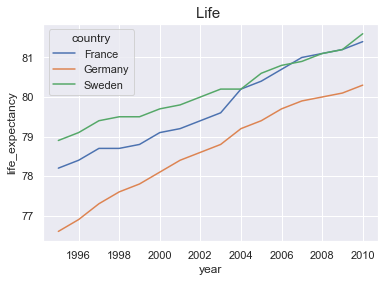

In [19]:
# Cellecting specific columns and plotting them
sns.set()

df_subset = df.loc[df['country'].isin(['Germany', 'France', 'Sweden'])]
sns.lineplot(x = 'year', y = 'life_expectancy', hue = 'country', data = df_subset);
plt.title('Life ', fontsize = 15);

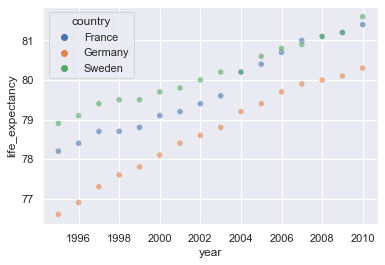

In [20]:
# Scatter plot:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
            data=df_subset, alpha=0.6);

### 6. Plotting the data for each year between 1995 and 2009

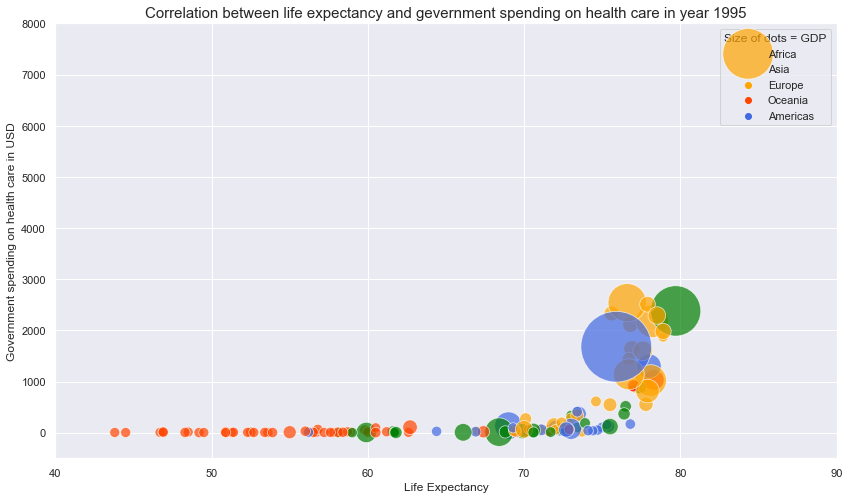

In [38]:
year = 1995

def scatterplot():
    
    df_subset_1 = df.loc[df['year'].isin([year])]
    plt.figure(figsize=(14, 8))
    color_dict = dict({'Africa':'orangered',
                  'Asia':'green',
                  'Europe': 'orange',
                  'Oceania': 'red',
                  'Americas': 'royalblue'})  
    sns.scatterplot(x = 'life_expectancy', y = 'government_health_spending',
                    data = df_subset_1, alpha = 0.7, hue = 'continent', palette = color_dict, 
                    size = "income_per_person", sizes = (100,5000)).axis([40, 90, -500, 8000])
    plt.xlabel('Life Expectancy')
    plt.ylabel('Government spending on health care in USD')
    plt.title('Correlation between life expectancy and gevernment spending on health care in year ' + str(year), fontsize = 15) 
    plt.legend((color_dict), title = "Size of dots = GDP")
    plt.savefig('scatterplot_images/Project1_' + str(year) + '.png')
    
scatterplot()

### Creating an animated scatter plot

In [43]:
year = 1995
while year < 2010:
    df_subset_1 = df.loc[df['year'].isin([year])]
    scatterplot()
    plt.close()
    year += 1

images = []
year = 1995
for i in range(0, 100):  
    filename = 'scatterplot_images/Project1_' + str(year) + '.png'.format(i)
    images.append(imageio.imread(filename)) 
    year += 1
    if year > 2009:
        break       
imageio.mimsave('scatterplot_images/scatterplot.gif', images, fps = 2)